# Day 2 - Homework
## Radhika Jangi 09/01/2020

## Load packages

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1: Download data
> data was downloaded from https://www.dropbox.com/s/p2ef992kl2jmmis/matrix_1kg.txt?dl=0

## 2: Alternate allele frequency

In [30]:
df_snp = pd.read_csv('/Users/cmdb/Desktop/bootcamp/matrix_1kg.txt',
                     sep = '\t')
df_snp.head()

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Get total alt allele sum across row minus first 4 columns
sum_allele = df_snp.iloc[:,4:].sum(axis=1)

In [32]:
# Get number of samples
hg_snp = df_snp.iloc[:,4:]
hg_snp.shape[1]

2548

In [33]:
# Calculate alt allele freq for each SNP
alt_allele_freq = sum_allele/(2*hg_snp.shape[1])
alt_allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

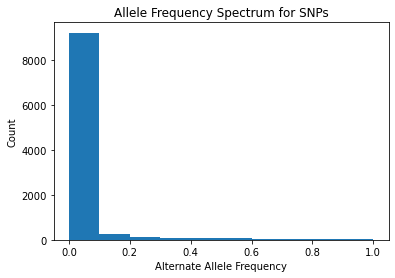

In [34]:
# Plot histogram of alt allele frequencies
fig, ax = plt.subplots()
ax.hist(alt_allele_freq)
ax.set_title('Allele Frequency Spectrum for SNPs')
ax.set_xlabel('Alternate Allele Frequency')
ax.set_ylabel('Count')
plt.show()

## 3: Common Variation

In [35]:
# Use boolean indexing to subset dataframe with alt_allele_freq within bounds
roi = (alt_allele_freq > 0.05) & (alt_allele_freq < 0.95)
common_var = df_snp.loc[roi,:]
common_var

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


## 4: PCA

In [36]:
# Get transposed subset of samples for pca
pca_input = common_var.iloc[:,4:].T
pca_input

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [37]:
# Standardize the genes to zero mean and unit variance
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

In [38]:
# Get 3 components for output
pca = PCA(n_components = 3)
pca_output = pca.fit_transform(pca_input_standardized)

In [39]:
#Label PCS with appropriate column names
pca_output_df = pd.DataFrame(data = pca_output, 
                             columns = ['PC1', 'PC2', 'PC3'])
pca_output_df

,PC1,PC2,PC3
0,-6.144930,-9.818567,-1.545582
1,-6.133884,-8.631829,2.557228
2,-6.238473,-7.971870,-0.745982
3,-5.051218,-7.008727,2.805662
4,-6.634383,-8.543670,3.071795
...,...,...,...
2543,-6.304582,-0.169819,-2.666332
2544,-6.295888,-3.116491,-5.556430
2545,-4.096947,-2.827362,-4.181370
2546,-6.263462,-2.585080,-4.225205


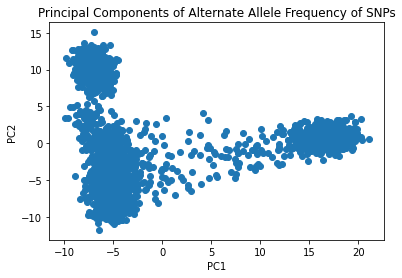

In [40]:
# Plot PCA data
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title('Principal Components of Alternate Allele Frequency of SNPs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

## 5: Advanced Exercise - Load metadata

In [41]:
#Load metadata
df_meta = pd.read_csv('/Users/cmdb/Desktop/bootcamp/integrated_call_samples_v3.20130502.ALL.panel',
                     sep = '\t')
df_meta

,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,HG00096,GBR,EUR,male,NaN,NaN
1,HG00097,GBR,EUR,female,NaN,NaN
2,HG00099,GBR,EUR,female,NaN,NaN
3,HG00100,GBR,EUR,female,NaN,NaN
4,HG00101,GBR,EUR,male,NaN,NaN
...,...,...,...,...,...,...
2499,NA21137,GIH,SAS,female,NaN,NaN
2500,NA21141,GIH,SAS,female,NaN,NaN
2501,NA21142,GIH,SAS,female,NaN,NaN
2502,NA21143,GIH,SAS,female,NaN,NaN


## 6: Plot coloring

In [42]:
# Remove Unnamed columns
df_meta = df_meta.iloc[:,:-2]
df_meta

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [43]:
#Bring back original indexes from input
pca_output_df['sample'] = pca_input.index
pca_output_df

,PC1,PC2,PC3,sample
0,-6.144930,-9.818567,-1.545582,HG00096
1,-6.133884,-8.631829,2.557228,HG00097
2,-6.238473,-7.971870,-0.745982,HG00099
3,-5.051218,-7.008727,2.805662,HG00100
4,-6.634383,-8.543670,3.071795,HG00101
...,...,...,...,...
2543,-6.304582,-0.169819,-2.666332,NA21137
2544,-6.295888,-3.116491,-5.556430,NA21141
2545,-4.096947,-2.827362,-4.181370,NA21142
2546,-6.263462,-2.585080,-4.225205,NA21143


In [44]:
# Merge based on sample column
pca_output_df = pd.merge(pca_output_df, df_meta, on= 'sample')
pca_output_df

,PC1,PC2,PC3,sample,pop,super_pop,gender
0,-6.144930,-9.818567,-1.545582,HG00096,GBR,EUR,male
1,-6.133884,-8.631829,2.557228,HG00097,GBR,EUR,female
2,-6.238473,-7.971870,-0.745982,HG00099,GBR,EUR,female
3,-5.051218,-7.008727,2.805662,HG00100,GBR,EUR,female
4,-6.634383,-8.543670,3.071795,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...
2498,-6.304582,-0.169819,-2.666332,NA21137,GIH,SAS,female
2499,-6.295888,-3.116491,-5.556430,NA21141,GIH,SAS,female
2500,-4.096947,-2.827362,-4.181370,NA21142,GIH,SAS,female
2501,-6.263462,-2.585080,-4.225205,NA21143,GIH,SAS,female


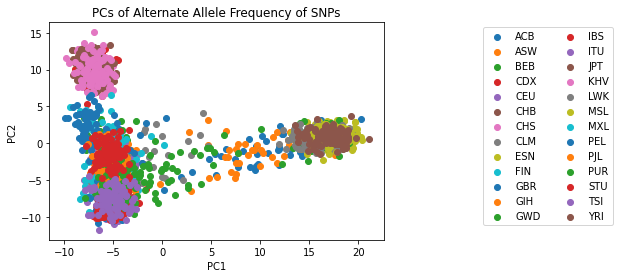

In [45]:
# Color plot based on population
fig, ax = plt.subplots()
pop = pca_output_df.groupby('pop')
for name, group in pop:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
#ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title('PCs of Alternate Allele Frequency of SNPs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

plt.show()

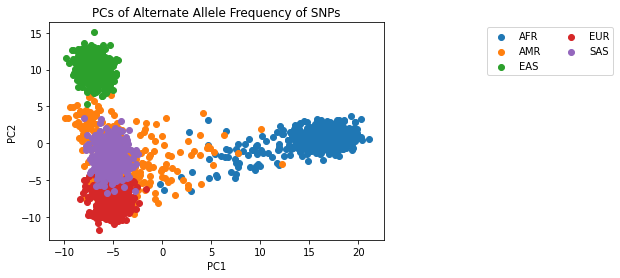

In [46]:
# Color plot based on super population
fig, ax = plt.subplots()
superpop = pca_output_df.groupby('super_pop')
for name, group in superpop:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
#ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title('PCs of Alternate Allele Frequency of SNPs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

plt.show()

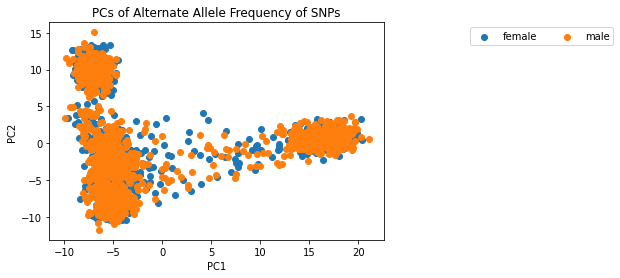

In [47]:
# Color plot based on gender
fig, ax = plt.subplots()
gender = pca_output_df.groupby('gender')
for name, group in gender:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
#ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title('PCs of Alternate Allele Frequency of SNPs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

plt.show()

## 7: 3D scatter

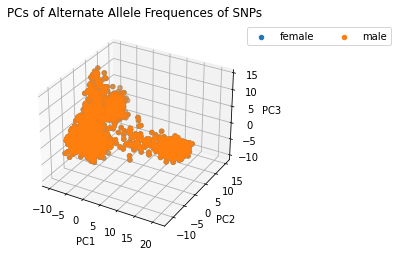

In [48]:
# Use PC3 here for 3D graph and color plot based on whatever you like (I chose gender)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
gender = pca_output_df.groupby('gender')
for name, group in gender:
    ax.scatter(pca_output_df['PC1'], pca_output_df['PC2'], pca_output_df['PC3'], label = name)
ax.set_title('PCs of Alternate Allele Frequences of SNPs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
    
plt.show()

Important links:
 >